In [1]:
import blocksci
import collections
import pandas as pd
import numpy as np
from pathlib import Path


parser_data_directory = Path("/mnt/anal/config.json")
cluster_directory = Path("/mnt/anal/cluster/")
dumplings_directory = Path("/mnt/dumplings/")

chain = blocksci.Blockchain(str(parser_data_directory))

from typing import Tuple

def get_block_height_for_date(date: str) -> int:
    return chain.range(date)[0].height

def get_block_height_range(start: str, end: str) -> Tuple[int, int]:
    return get_block_height_for_date(start), get_block_height_for_date(end)


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def compute_log_log_graph(arr):
    cluster_sizes = np.array(list(map(lambda c: c.address_count(), arr)))
    
    # Filter out non-positive values
    cluster_sizes = cluster_sizes[cluster_sizes > 0]
    
    # Create logarithmically spaced bins
    bins = np.logspace(np.log10(cluster_sizes.min()), np.log10(cluster_sizes.max()), num=50)
    
    # Compute the histogram data
    hist, bin_edges = np.histogram(cluster_sizes, bins=bins)
    
    # Replace zero counts with NaN to avoid log scale issues
    hist = np.where(hist == 0, np.nan, hist)
    
    # Compute the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    plt.figure(figsize=(12, 6))
    
    # Plot the histogram as a smooth line
    plt.plot(bin_centers, hist, marker='o')
    
    # Set both axes to logarithmic scale
    plt.xscale('log')
    plt.yscale('log')
    
    plt.title('Cluster Size Distribution (Line Plot with Log-Log Scale)')
    plt.xlabel('Cluster Size (Log Scale)')
    plt.ylabel('Frequency (Log Scale)')
    
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()


# Wasabi2 clusters

In [7]:
# import random

one_random_wp_cj = chain.tx_with_hash("9ea3e5d217c76e6be6ace7fe4fb3622976103466de81d2b02cd87c54f9e91a2f")
# one_random_wp_cj = chain.tx_with_hash("00ab23721356a159b695060b3975469fa0703e55398e9123ef59d2a5b94b1058")
address_im_looking_for = one_random_wp_cj.outputs[1].spending_tx.outputs[0].address
print(address_im_looking_for)

start = one_random_wp_cj.block_height
stop = one_random_wp_cj.block_height + 1

start = 0
stop = len(chain)

# clusterer = blocksci.cluster.ClusterManager(str(cluster_directory / "fr"), chain)

heu = blocksci.heuristics.coinjoin.input_one_hop
heu = heu and blocksci.heuristics.coinjoin.output_three_hop_threshold
heu = heu and blocksci.heuristics.coinjoin.output_two_hop_threshold 
heu = heu and blocksci.heuristics.coinjoin.output_one_hop_threshold 

%time clusterer = blocksci.cluster.CoinjoinClusterManager.create_clustering(  \
    chain=chain, \
    start=start, \
    stop=stop, \
    output_path="/mnt/anal/clustering/wasabi2_out_threshold/", \
    overwrite=True, \
    coinjoin_type="wasabi2", \
    heuristicFunc=heu \
)


bc1qxvsjlwnrhel0elpcv0tmhflrxl7t7hphgau3pf
Collected 15858241 addresses
Creating disjoint sets of size 15858241
Created disjoint sets of size 15858241
Preparing to serialize cluster data
Serializing cluster data
Serialized
CPU times: user 4min 35s, sys: 26.9 s, total: 5min 2s
Wall time: 1min 17s


CPU times: user 10.8 s, sys: 1.95 s, total: 12.8 s
Wall time: 12.9 s


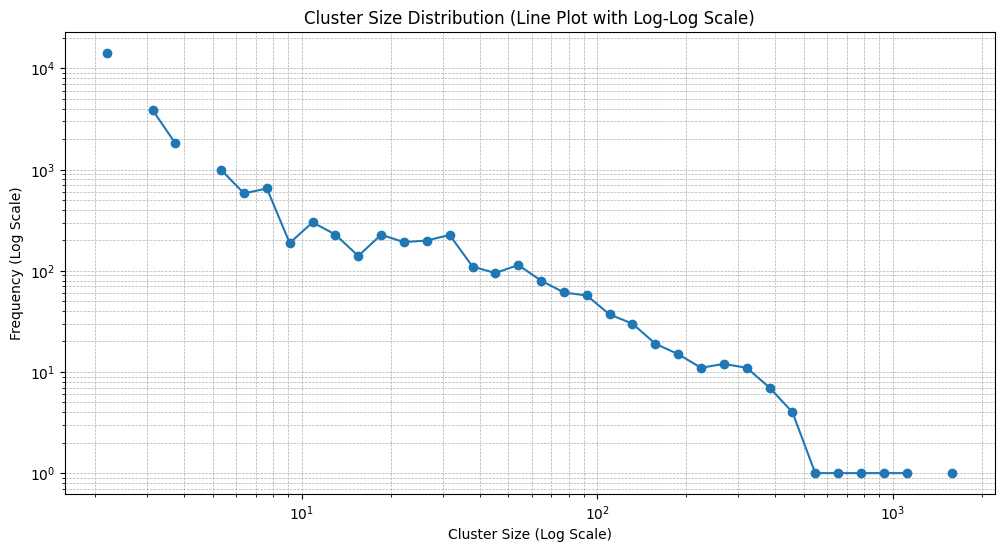

In [8]:
ww2_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/wasabi2_out_threshold/", chain)
%time ww2_clusters = [cluster for cluster in ww2_clusterer.clusters() if cluster.address_count() > 1]
compute_log_log_graph(ww2_clusters)

# Whirlpool clusters
`9ea3e5d217c76e6be6ace7fe4fb3622976103466de81d2b02cd87c54f9e91a2f` should have 21 clustered addresses by the simple one output heuristics
`00ab23721356a159b695060b3975469fa0703e55398e9123ef59d2a5b94b1058` should have 567 addresses clustered

In [4]:
one_random_wp_cj = chain.tx_with_hash("9ea3e5d217c76e6be6ace7fe4fb3622976103466de81d2b02cd87c54f9e91a2f")
one_random_wp_cj = chain.tx_with_hash("00ab23721356a159b695060b3975469fa0703e55398e9123ef59d2a5b94b1058")
one_random_wp_cj = chain.tx_with_hash("021dc91d5d9d74babeed5dbf12a6287cbc4a46317afa357b45c46776940cf902")
address_im_looking_for = one_random_wp_cj.outputs[1].spending_tx.outputs[0].address
print(address_im_looking_for)

start = one_random_wp_cj.block_height
stop = one_random_wp_cj.block_height + 91302

start = 0
stop = len(chain)

heu = blocksci.heuristics.coinjoin.input_one_hop
heu = heu and blocksci.heuristics.coinjoin.output_three_hop_threshold
heu = heu and blocksci.heuristics.coinjoin.output_two_hop_threshold 
heu = heu and blocksci.heuristics.coinjoin.output_one_hop

# clusterer = blocksci.cluster.ClusterManager(str(cluster_directory / "fr"), chain)

%time clusterer = blocksci.cluster.CoinjoinClusterManager.create_clustering(  \
    chain=chain, \
    start=start, \
    stop=stop, \
    output_path="/mnt/anal/clustering/whirlpool_out_threshold2/", \
    overwrite=True, \
    coinjoin_type="whirlpool", \
    heuristicFunc=heu, \
)


bc1qttdxayfzyup2gaw4dkdjz0smlwylmtzpy6a3e9
Collected 5135482 addresses
Creating disjoint sets of size 5135482
Created disjoint sets of size 5135482
Preparing to serialize cluster data
Serializing cluster data
Serialized
CPU times: user 9min 19s, sys: 13.6 s, total: 9min 33s
Wall time: 40.6 s


CPU times: user 3.4 s, sys: 63.1 ms, total: 3.47 s
Wall time: 3.49 s


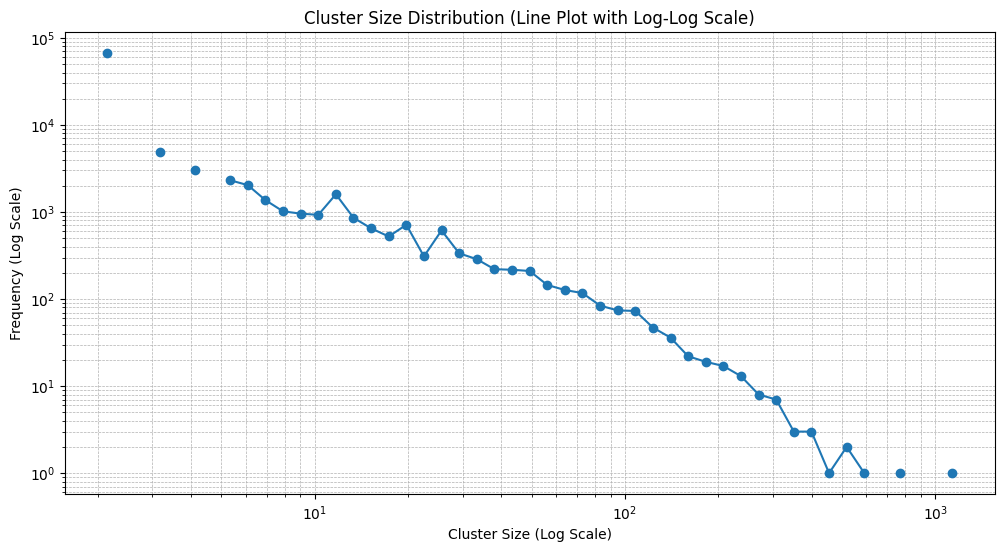

In [5]:
wp_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/whirlpool_out_threshold2/", chain)
%time wp_clusters = [cluster for cluster in wp_clusterer.clusters() if cluster.address_count() > 1]
compute_log_log_graph(wp_clusters)

CPU times: user 3.54 s, sys: 630 ms, total: 4.17 s
Wall time: 4.21 s


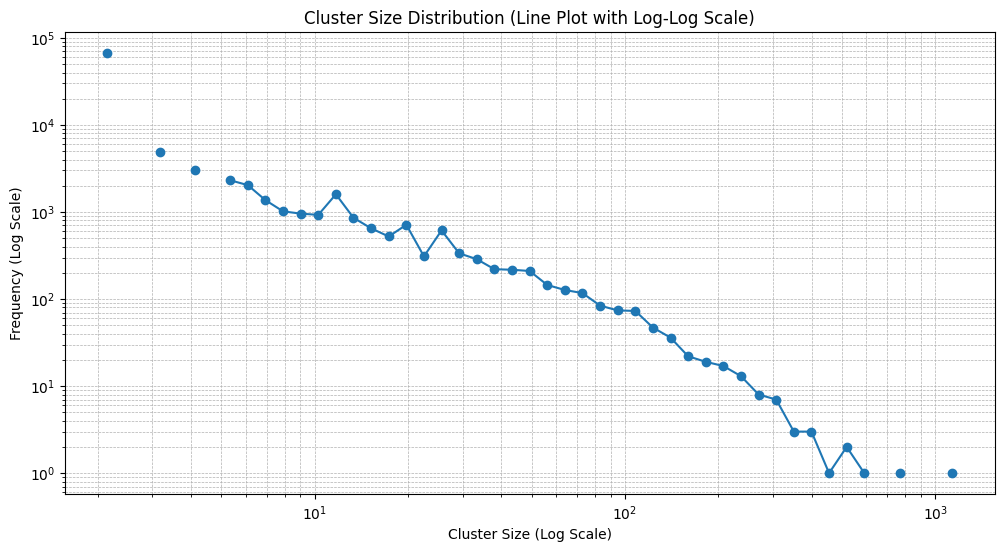

In [13]:
wp_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/whirlpool_out_threshold2/", chain)
%time wp_clusters = [cluster for cluster in wp_clusterer.clusters() if cluster.address_count() > 1]
compute_log_log_graph(wp_clusters)

CPU times: user 3.28 s, sys: 54.5 ms, total: 3.34 s
Wall time: 3.36 s


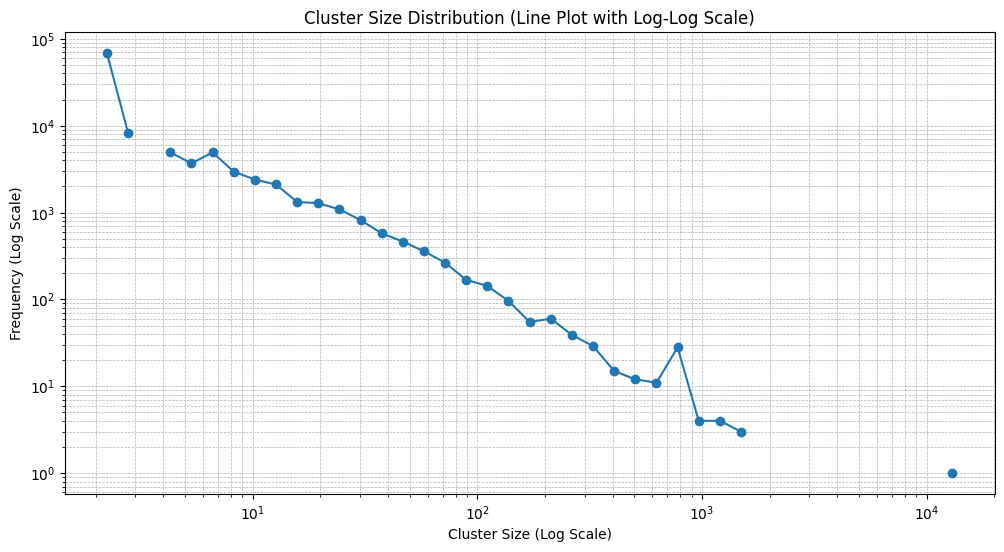

In [6]:
wp_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/whirlpool_out_threshold/", chain)
%time wp_clusters = [cluster for cluster in wp_clusterer.clusters() if cluster.address_count() > 1]
compute_log_log_graph(wp_clusters)

# Wasabi1 clustering


In [9]:
# import random

# one_random_wp_cj = chain.tx_with_hash("9ea3e5d217c76e6be6ace7fe4fb3622976103466de81d2b02cd87c54f9e91a2f")
# one_random_wp_cj = chain.tx_with_hash("00ab23721356a159b695060b3975469fa0703e55398e9123ef59d2a5b94b1058")
#address_im_looking_for = one_random_wp_cj.outputs[1].spending_tx.outputs[0].address
# print(address_im_looking_for) 10213510

start = one_random_wp_cj.block_height
stop = one_random_wp_cj.block_height + 1

start = 0
stop = len(chain)

heu = blocksci.heuristics.coinjoin.input_one_hop
heu = heu and blocksci.heuristics.coinjoin.output_three_hop_threshold
heu = heu and blocksci.heuristics.coinjoin.output_two_hop_threshold 
heu = heu and blocksci.heuristics.coinjoin.output_one_hop


%time clusterer = blocksci.cluster.CoinjoinClusterManager.create_clustering(  \
    chain=chain, \
    start=start, \
    stop=stop, \
    output_path="/mnt/anal/clustering/wasabi1_out_threshold2/", \
    overwrite=True, \
    coinjoin_type="wasabi1", \
    heuristicFunc=heu, \
)


Collected 10236857 addresses
Creating disjoint sets of size 10236857
Created disjoint sets of size 10236857
Preparing to serialize cluster data
Serializing cluster data
Serialized
CPU times: user 5min 44s, sys: 17.2 s, total: 6min 1s
Wall time: 1min 2s


CPU times: user 6.74 s, sys: 1.36 s, total: 8.09 s
Wall time: 8.14 s


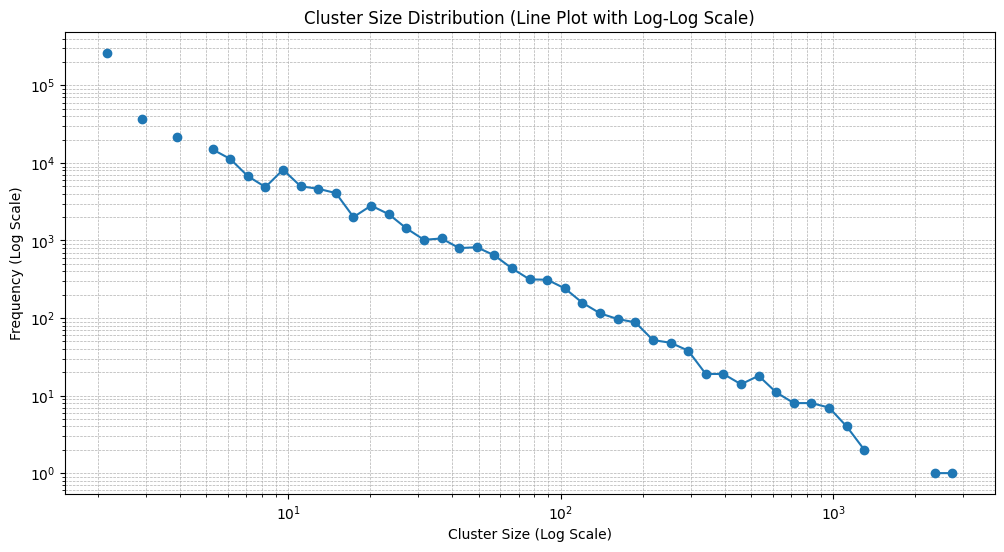

In [10]:
ww1_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/wasabi1_out_threshold2/", chain)
%time ww1_clusters = [cluster for cluster in ww1_clusterer.clusters() if cluster.address_count() > 1]
compute_log_log_graph(ww1_clusters)

CPU times: user 5.02 s, sys: 120 ms, total: 5.14 s
Wall time: 5.17 s


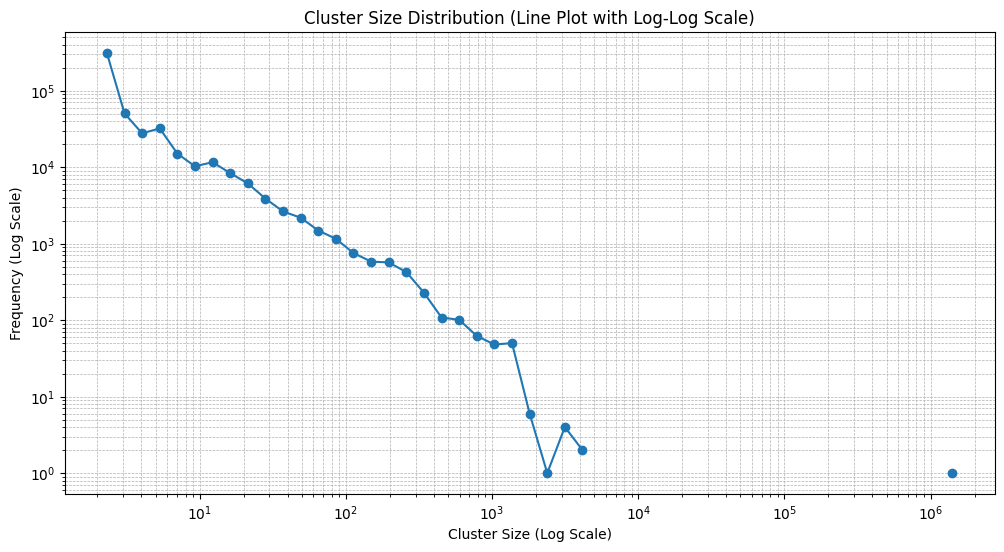

In [21]:
ww1_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/wasabi1_out_threshold/", chain)
%time ww1_clusters = [cluster for cluster in ww1_clusterer.clusters() if cluster.address_count() > 1]
compute_log_log_graph(ww1_clusters)

# Other cluster statistics

In [11]:
ww1_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/wasabi1_out_threshold2/", chain)
wp_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/whirlpool_out_threshold2/", chain)
ww2_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/wasabi2_out_threshold/", chain)

In [12]:
%time ww2_clusters = [cluster for cluster in ww2_clusterer.clusters() if cluster.address_count() > 1]
%time ww1_clusters = [cluster for cluster in ww1_clusterer.clusters() if cluster.address_count() > 1]
%time wp_clusters = [cluster for cluster in wp_clusterer.clusters() if cluster.address_count() > 1]


CPU times: user 10.6 s, sys: 83.6 ms, total: 10.7 s
Wall time: 10.8 s
CPU times: user 6.62 s, sys: 96.7 ms, total: 6.71 s
Wall time: 6.75 s
CPU times: user 3.44 s, sys: 53.8 ms, total: 3.5 s
Wall time: 3.52 s


In [19]:
from tabulate import tabulate

print(tabulate(
    [
        [
            "Wasabi Wallet 1", 
            10236857,
            len(ww1_clusters), 
            max(map(lambda c: c.address_count(), ww1_clusters))
        ],
        [
            "Wasabi Wallet 2", 
            15858241,
            len(ww2_clusters), 
            max(map(lambda c: c.address_count(), ww2_clusters))
        ],
        [
            "Samourai Whirlpool", 
            5135482,
            len(wp_clusters), 
            max(map(lambda c: c.address_count(), wp_clusters))
        ],
        
    ],
    headers=['Pool', "Total addresses collected", "Number of clusters", "Biggest cluster size"], 
    tablefmt='orgtbl'
    )
)


| Pool               |   Total addresses collected |   Number of clusters |   Biggest cluster size |
|--------------------+-----------------------------+----------------------+------------------------|
| Wasabi Wallet 1    |                    10236857 |               394426 |                   2938 |
| Wasabi Wallet 2    |                    15858241 |                24450 |                  12262 |
| Samourai Whirlpool |                     5135482 |                90733 |                   1210 |


In [18]:
biggest_cluster = max(ww2_clusters, key=lambda c: c.address_count())

for a in biggest_cluster.addresses.to_list():
    print(a)
    break

ScriptHashAddress(34wKSdAsXTSAEpYFG4qhLknVHawaNVB1Z9, wrapped_address=WitnessScriptHashAddress(bc1qhuqkd592st4jleafwh6zwxfdw708jh6qzpn9fhp2wzk32kc8uzesaqqgjs, wrapped_address=MultisigAddress(2 of 3 multisig with addresses 1HM2wTQw9YEkkvMTitCrdGAE8PrJ8pShHF, 1CYRNDSsHxMAE7JVKTt3s27hsV4YWwYe9q, 1PD13uZjukxdTFSLDNJDDiXndbDrQN9Qyf)))
